In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-clustering/segmentation data.csv
/kaggle/input/customer-clustering/segmentation data legend.xlsx


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [26]:
data = pd.read_csv(r"/kaggle/input/customer-clustering/segmentation data.csv")

In [27]:
data

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [29]:
data.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [30]:
data.isnull().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [31]:
data.duplicated().any()

False

In [32]:
print("standard deviation of data:", round(data.std()  , 4))
print("variance in the data:" , round(data.var() , 4))

standard deviation of data: ID                   577.4946
Sex                    0.4983
Marital status         0.5001
Age                   11.7194
Education              0.5998
Income             38108.8247
Occupation             0.6386
Settlement size        0.8125
dtype: float64
variance in the data: ID                 3.335000e+05
Sex                2.483000e-01
Marital status     2.501000e-01
Age                1.373444e+02
Education          3.597000e-01
Income             1.452283e+09
Occupation         4.078000e-01
Settlement size    6.602000e-01
dtype: float64


In [33]:
data.columns

Index(['ID', 'Sex', 'Marital status', 'Age', 'Education', 'Income',
       'Occupation', 'Settlement size'],
      dtype='object')

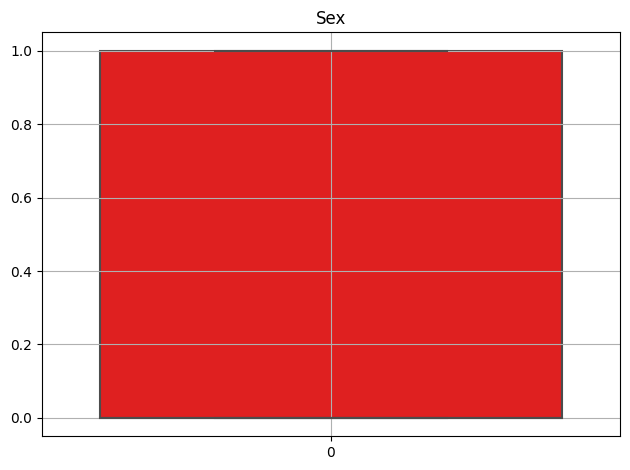

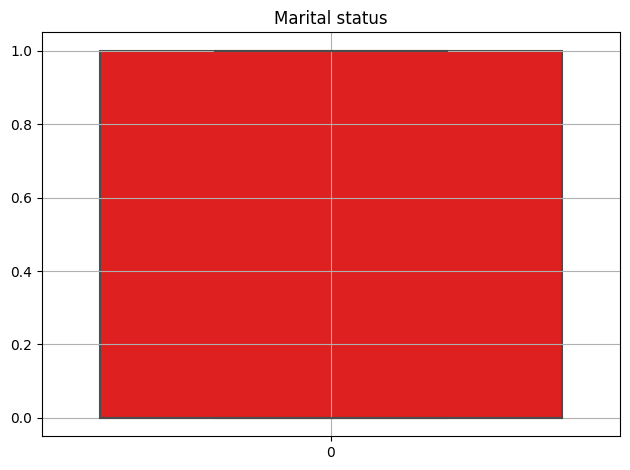

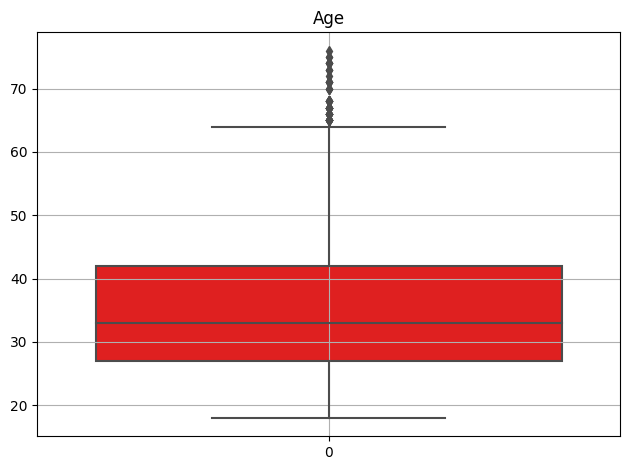

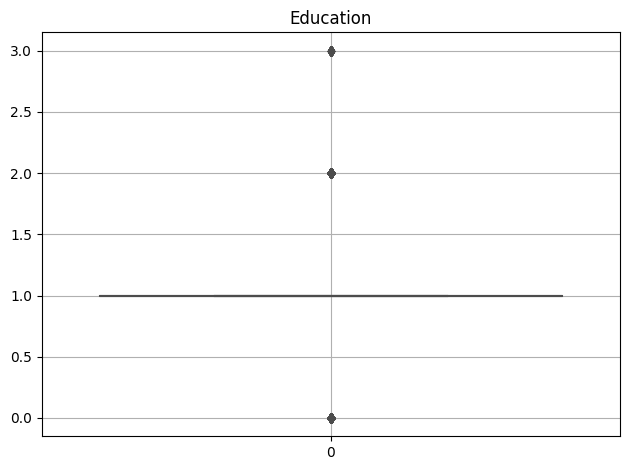

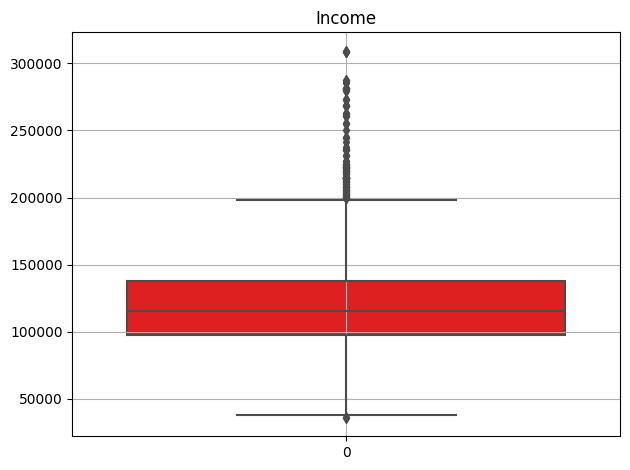

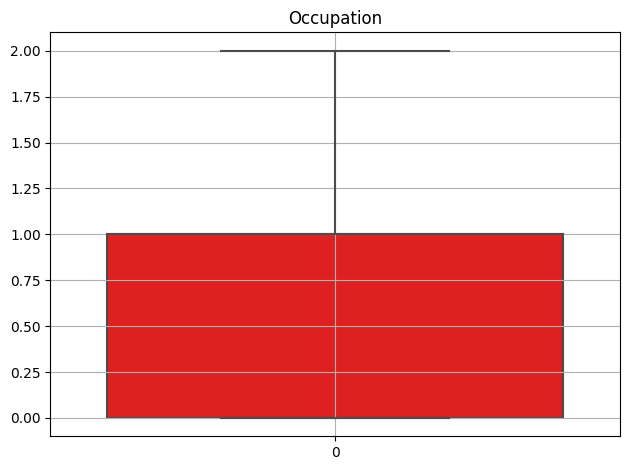

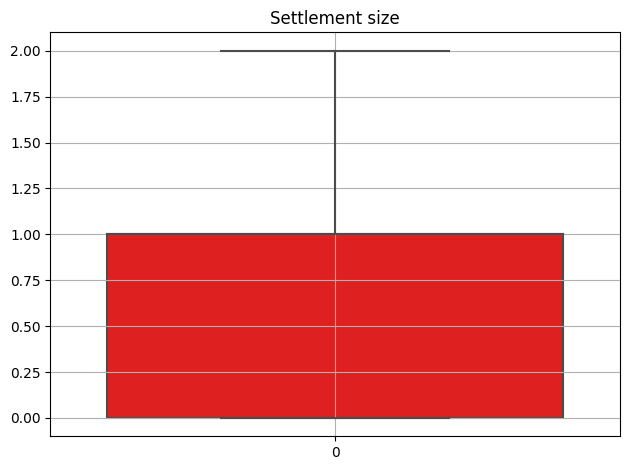

In [34]:
for i in ['Sex', 'Marital status', 'Age', 'Education', 'Income',
       'Occupation', 'Settlement size']:
    sn.boxplot(data[i] , color = "red")
    plt.title(i)
    plt.tight_layout()
    plt.grid()
    plt.show()

In [35]:
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
iqr = q3-q1
upper_bound = q3+1.5*(iqr)
lower_bound = q1-1.5*(iqr)
print("upper_bound:",upper_bound)
print("lower_bound:",lower_bound)

upper_bound: ID                 1.000030e+08
Sex                2.500000e+00
Marital status     2.500000e+00
Age                6.450000e+01
Education          1.000000e+00
Income             1.986858e+05
Occupation         2.500000e+00
Settlement size    2.500000e+00
dtype: float64
lower_bound: ID                 99999001.50
Sex                      -1.50
Marital status           -1.50
Age                       4.50
Education                 1.00
Income                37049.75
Occupation               -1.50
Settlement size          -1.50
dtype: float64


In [36]:
data = data[~((data>upper_bound))|((data<lower_bound))]

In [37]:
data

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,NaN,NaN,124670.0,1,2
1,100000002,1,1,22.0,1.0,150773.0,1,2
2,100000003,0,0,49.0,1.0,89210.0,0,0
3,100000004,0,0,45.0,1.0,171565.0,1,1
4,100000005,0,0,53.0,1.0,149031.0,1,1
...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47.0,1.0,123525.0,0,0
1996,100001997,1,1,27.0,1.0,117744.0,1,0
1997,100001998,0,0,31.0,0.0,86400.0,0,0
1998,100001999,1,1,24.0,1.0,97968.0,0,0


In [38]:
data.isnull().sum()

ID                   0
Sex                  0
Marital status       0
Age                 57
Education          327
Income              81
Occupation           0
Settlement size      0
dtype: int64

In [39]:
data = data.dropna()

In [40]:
data.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
1,100000002,1,1,22.0,1.0,150773.0,1,2
2,100000003,0,0,49.0,1.0,89210.0,0,0
3,100000004,0,0,45.0,1.0,171565.0,1,1
4,100000005,0,0,53.0,1.0,149031.0,1,1
5,100000006,0,0,35.0,1.0,144848.0,0,0


In [41]:
data.shape

(1629, 8)

In [55]:
from sklearn.decomposition import PCA

In [57]:
x_pca = PCA(n_components = 3)
x = x_pca.fit_transform(data)

In [58]:
x

array([[ 3.75962716e+04,  7.79431546e+02, -1.23521219e+01],
       [-2.39653405e+04,  1.19249992e+03,  1.92913550e+01],
       [ 5.83877893e+04,  6.37563278e+02,  9.12405749e+00],
       ...,
       [-2.67886971e+04, -7.83540759e+02,  1.14758499e-01],
       [-1.52209661e+04, -8.62345425e+02, -7.78467455e+00],
       [-4.47723041e+04, -6.64571705e+02, -4.53636049e+00]])

In [59]:
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage , dendrogram

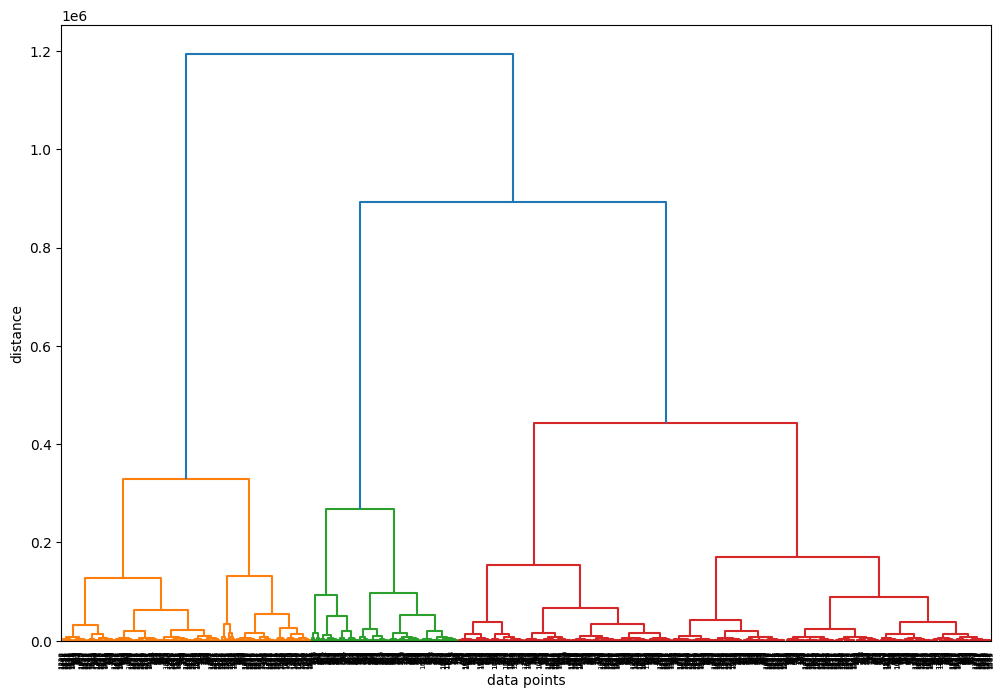

In [60]:
z = linkage(x , method = "ward")
plt.figure(figsize = (12,8))
dendrogram(z)
plt.xlabel("data points")
plt.ylabel("distance")
plt.show()

In [70]:
wcss = []
for k in range(1,11):
    kmean = KMeans(n_clusters = 4 , init = "k-means++"  , random_state = 42)
    kmean.fit(x)
    wcss.append(kmean.inertia_)
    wcss

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

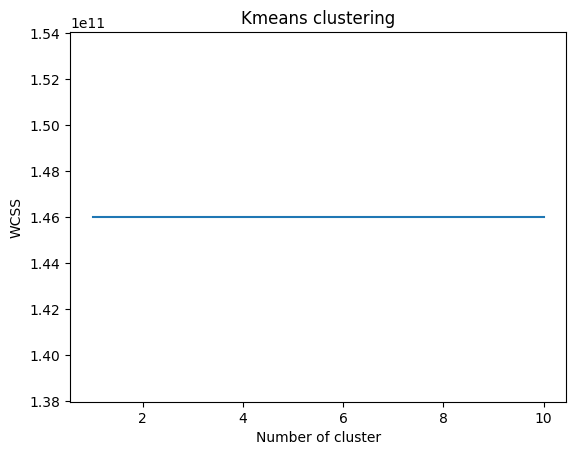

In [71]:
plt.plot(range(1,11) , wcss)
plt.title("Kmeans clustering")
plt.xlabel("Number of cluster")
plt.ylabel("WCSS")
plt.show()